## 앙상블
- 단일 결정 트리의 단점을 극복하기 위해 여러 머신러닝 모델을 연결하여 더 강력한 모델로 만드는 방법
- 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측 모형들을 조합하여 하나의 최종 예측 모형으로 만드는 것
- 대표적인 기법 : 배깅, 부스팅, 랜덤포레스트

## 1. 배깅 (Bagging, Bootstrap Aggregating)

### ✅ 아이디어
- 데이터를 **여러 번 중복 추출(bootstrap sampling)** → 여러 개의 학습 데이터셋 생성
- 같은 알고리즘(예: 여러 개의 결정트리)을 각각 학습
- 최종 예측 = **평균(회귀)** 또는 **투표(분류)**

### ✅ 특징
- 병렬적으로 모델 학습 가능 → 안정성↑, 분산(variance) 감소
- 과적합 방지 효과 있음
- 대표 알고리즘: **BaggingClassifier, BaggingRegressor**

In [4]:
import pandas as pd

In [5]:
breast = pd.read_csv("./data/breast-cancer.csv")
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='diagnosis', ylabel='count'>

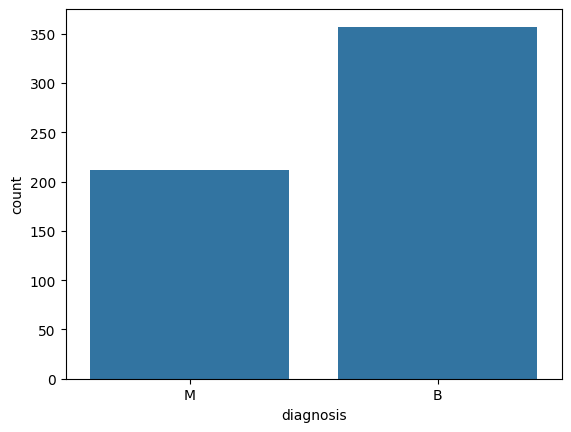

In [7]:
plt.figure()
sns.countplot(x = 'diagnosis', data=breast)

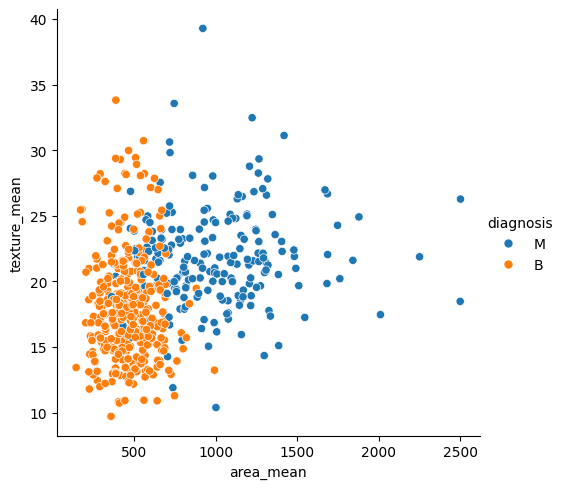

In [8]:
## 설명 변수 area_mean, texture_mean 설정
## 타깃 변수 diagnosis 설정
## 산점도 그래프 
sns.relplot(x = 'area_mean', y = 'texture_mean', hue='diagnosis', data=breast)

In [9]:
## 진단 데이터를 이산형으로 변경 M이면 1 아니면 0
## 데이터를 분할
import numpy as np 
from sklearn.model_selection import train_test_split

In [10]:
breast['diagnosis'] = np.where(breast['diagnosis'] == "M", 1, 0)
features = ['area_mean', 'texture_mean']
x = breast[features]
y = breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [13]:
## 배깅을 이용하여 분류기를 생성 예측 수행
clf = BaggingClassifier(estimator=DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, pred))

정확도 :  1.0


In [14]:
## 혼동행렬을 반환하여 예측 결과를 자세히 확인 
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, pred), 
    index = ['true[0]', 'true[1]'], 
    columns = ['pred[0]', 'pred[1]']
)

,pred[0],pred[1]
true[0],101,6
true[1],15,49


In [16]:
## oob_socre를 이용하여 모델 평가
## oob_score를 True로 설정하면 기능을 사용
## 검증세트나 교차검증을 하지 않아도 되는 장점
clf_oob = BaggingClassifier(estimator=DecisionTreeClassifier(), oob_score=True)
print(clf_oob.fit(x, y).oob_score_)

0.8787346221441125


c:\Users\ekfla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:917: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\ekfla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:923: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [17]:
## 배깅 방식으로 회귀분석
## 자동차 데이터를 로드하여 자동차의 가격을 예측
car = pd.read_csv("./data/CarPrice_Assignment.csv")
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
## 데이터에서 연속형 변수들을 종속변수로 설정
## price 데이터를 타깃 데이터 설정
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']

In [20]:
## 배깅을 이용하여 회귀 분석 모델 생성
## oob_score를 이용하여 모델 평가 
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

reg = BaggingRegressor(estimator=DecisionTreeRegressor(), oob_score=True)
reg = reg.fit(x, y)
reg.oob_score_

c:\Users\ekfla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:1464: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.912260542712833

# 🌳 Decision Tree (의사결정나무)

## 1. 정의
- 데이터를 분류(Classification)하거나 회귀(Regression)하기 위해 **조건 분할**을 반복하며 트리를 형성하는 모델
- Root → 조건 분할 → Leaf로 내려가면서 최종 예측
- 사람이 해석하기 쉬운 모델이며, 랜덤포레스트·부스팅 계열의 기본 학습기(weak learner)로도 활용됨

---

## 2. 원리
- 특징(feature)을 기준으로 데이터를 나눔
- 좋은 분할 = **불순도(impurity) 감소**가 큰 경우
  - 분류(Classification): 지니 계수(Gini), 엔트로피(Entropy)
  - 회귀(Regression): 분산 감소, MSE
- 조건(깊이, 샘플 수 제한 등)에 도달하면 분할을 멈춤

---

## 3. 주요 매개변수 (Parameters, 기본값 포함)

- **criterion** (default=`"gini"` 분류 / `"squared_error"` 회귀)  
  - 분할 품질 기준  
  - `"gini"`: 지니 불순도 (분류 기본값)  
  - `"entropy"`: 엔트로피 (정보 이득 기반)  
  - `"log_loss"`: 로그 손실 (확률적 분류)  
  - `"squared_error"`: 평균 제곱 오차 (회귀 기본값)  
  - `"friedman_mse"`: 분산 감소 기반 (회귀)  
  - `"absolute_error"`: 평균 절대 오차 (회귀)  

- **splitter** (default=`"best"`)  
  - 분할 시 특징 선택 방식  
  - `"best"`: 가장 좋은 특징 선택  
  - `"random"`: 무작위 특징 선택 (앙상블 다양성↑)  

- **max_depth** (default=`None`)  
  - 트리의 최대 깊이  
  - 제한 없으면 리프까지 계속 분할 → 과적합 위험  

- **min_samples_split** (default=`2`)  
  - 노드를 분할하기 위해 필요한 최소 샘플 수  

- **min_samples_leaf** (default=`1`)  
  - 리프 노드가 되기 위한 최소 샘플 수  

- **min_weight_fraction_leaf** (default=`0.0`)  
  - 전체 가중치 합 대비 리프 노드 최소 비율  

- **max_features** (default=`None`)  
  - 최적 분할 시 고려할 특징 수  
  - `None`: 모든 특징 사용  
  - `"sqrt"`: √(특징 수) 사용  
  - `"log2"`: log₂(특징 수) 사용  
  - 정수/실수로 직접 지정 가능  

- **random_state** (default=`None`)  
  - 난수 고정용 시드값 (재현성 확보)  

- **max_leaf_nodes** (default=`None`)  
  - 리프 노드 개수 제한  

- **min_impurity_decrease** (default=`0.0`)  
  - 불순도 감소량이 이 값 이상일 때만 분할 수행  

- **class_weight** (default=`None`)  
  - 클래스 가중치 조정 (불균형 데이터에 활용)  

- **ccp_alpha** (default=`0.0`)  
  - 비용-복잡도 가지치기 파라미터 (값↑ → 트리 단순화)  

---

## 4. 주요 속성 (Attributes)

- **feature_importances_**: 각 특징의 중요도 (0~1, 합=1)  
- **classes_**: 분류 문제에서 클래스 목록  
- **n_classes_**: 클래스 개수  
- **n_features_in_**: 입력 데이터의 특징 개수  
- **tree_**: 트리 구조(노드, 자식, 분할 기준 등)에 대한 상세 객체  

---

## 5. 주요 메서드 (Methods)

- **fit(X, y)**: 학습 데이터(X, y)로 모델 학습  
- **predict(X)**: 입력 X에 대한 예측 결과 반환  
- **predict_proba(X)**: 각 클래스의 예측 확률 반환 (분류 전용)  
- **score(X, y)**: 분류 정확도(accuracy) / 회귀 R² 반환  
- **get_params() / set_params()**: 하이퍼파라미터 확인 및 변경  
- **export_text / export_graphviz**: 트리 구조 시각화  

---

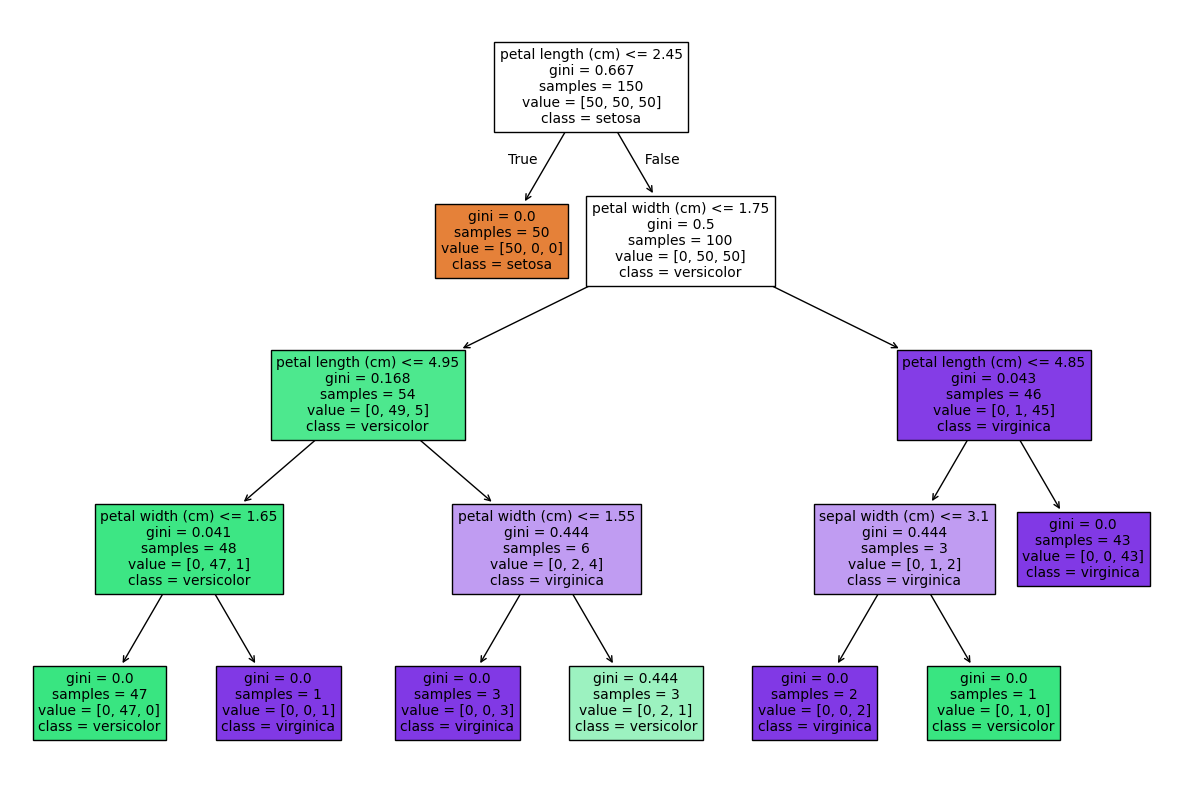

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 데이터 로드
X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names
class_names = load_iris().target_names

# 모델 학습
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# 트리 시각화
plt.figure(figsize=(15, 10))  # 그림 크기 조정
plot_tree(
    clf, 
    feature_names=feature_names,  # 특징 이름
    class_names=class_names,      # 클래스 이름
    filled=True,                  # 노드 색상 표시
    rounded=False,                 # 모서리 둥글게
    fontsize=10                   # 글자 크기
)
plt.show()

## 2. 부스팅 (Boosting)

### ✅ 아이디어
- 모델을 **순차적으로 학습**
- 이전 모델이 잘못 맞춘 데이터에 **가중치↑** → 다음 모델이 집중 학습
- 여러 약한 학습기(weak learner, 보통 얕은 트리)를 합쳐 강한 학습기 생성

### ✅ 특징
- 장점

  - 편향(bias) 감소 → 더 강력한 예측 성능

  - 작은 모델(얕은 트리)도 조합하면 높은 성능 달성 가능

- 단점

  - 순차적 학습 → 병렬화 어려움 → 학습 속도 느림

  - 과적합 위험 (특히 학습 반복이 너무 많을 때)

  - 하이퍼파라미터(학습률, 트리 깊이 등) 튜닝이 필요
- 대표 알고리즘:
### ✅ AdaBoost (Adaptive Boosting)
- 오차가 큰 샘플에 더 높은 가중치 부여
- 각 모델은 “가중치가 조정된 데이터셋”으로 학습
- 최종 예측은 **가중치 합산**으로 결정

### ✅ Gradient Boosting (GBM)
- 이전 모델의 **잔차(residual)**를 예측하는 새로운 모델을 추가
- 손실 함수(loss function)를 직접 최적화
- 계산량이 많음

### ✅ XGBoost
- GBM을 개선한 알고리즘
- 규제(Regularization), 병렬 학습 지원 → 빠르고 과적합 방지
- Kaggle 등 대회에서 자주 사용

### ✅ LightGBM
- XGBoost보다 더 빠름
- 대용량 데이터 처리에 최적화 (Histogram 기반 학습)

### ✅ CatBoost
- 범주형 변수(categorical feature) 자동 처리
- 비교적 튜닝이 간단

# 🚀 AdaBoost (Adaptive Boosting)

부스팅의 한 종류로, **약한 학습기(보통 얕은 결정트리)**를 **순차적으로 학습**시키며
이전 단계에서 틀린 샘플에 더 큰 가중치를 부여해 **오류를 점차 보완**하는 앙상블 기법.

---

## 1) 개념 요약
- 초기에는 모든 샘플 가중치 동일.
- 1번째 약한 모델을 학습 → 오분류 샘플의 **가중치↑**.
- 다음 모델은 가중치가 커진 샘플을 더 잘 맞추도록 학습.
- 이렇게 만든 여러 모델의 **가중 합(분류)/평균(회귀)**으로 최종 예측.

---

## 2) 분류: `sklearn.ensemble.AdaBoostClassifier`

### 주요 매개변수 (Parameters)
- **estimator**: `BaseEstimator | None` (기본: `None`)
  - 약한 학습기. `None`이면 깊이 1의 `DecisionTreeClassifier(max_depth=1)`(decision stump).
  - DecisionTreeClassifier(max_depth=1) → 전형적인 기본값 (stump)
  - DecisionTreeClassifier(max_depth=2~3) → 조금 더 복잡한 규칙 허용
  - LogisticRegression(max_iter=1000) → 선형 분류기
  - SVC(kernel="linear", probability=True) → 선형 SVM (확률 예측 켜야 AdaBoost와 호환)
- **n_estimators**: `int` (기본: `50`)
  - 약한 학습기의 개수(부스팅 단계 수). 너무 크면 과적합 가능.
  - 많을수록 모델이 점진적으로 더 복잡해지고 훈련 데이터에 잘 맞춤
- **learning_rate**: `float` (기본: `1.0`)
  - 각 단계 기여도(가중). `n_estimators`와 상호 보완적(작게 하면 단계를 더 늘여 사용).
  - 각 약한 학습기의 기여도를 조절하는 스케일 값
  - 값이 작으면 → 각 단계의 영향이 줄어듦 → 더 많은 학습기를 필요로 함
- **algorithm**: `{"SAMME", "SAMME.R"}` (기본: `"SAMME.R"`)
  - `SAMME.R`: 확률(로그 확률변환) 사용, 보통 더 빠르고 성능 우수.
  - `SAMME`: 클래스 점수 기반(확률 필요 없음).
- **random_state**: `int | RandomState | None` (기본: `None`)
  - 재현성 제어(약한 트리에 랜덤성이 있을 때).

- 보통 n_estimators는 100~500 정도,

- learning_rate는 0.01 ~ 1.0 사이에서 탐색

  - 규칙:

    - 데이터 크기/복잡도가 클수록 **n_estimators ↑, learning_rate ↓**가 유리

    - 작은 데이터셋에서는 **n_estimators ↓, learning_rate ↑**로 단순하게

### 주요 속성 (Attributes)
- **estimators_**: 학습된 약한 학습기 리스트.
- **estimator_weights_**: 각 단계별 학습기 가중치(분류에서 중요).
- **estimator_errors_**: 단계별 훈련 오차율.
- **classes_**: 학습된 클래스 라벨 목록.
- **n_classes_**: 클래스 수.
- **n_features_in_**: 입력 특징 개수.
- **feature_importances_**: 특징 중요도(약한 트리들의 가중치 합으로 산출).

### 주요 메서드 (Methods)
- **fit(X, y[, sample_weight])**: 모델 학습. `sample_weight`로 클래스 불균형 대응 가능.
- **predict(X)**: 클래스 라벨 예측.
- **predict_proba(X)**: 클래스별 확률 예측(`SAMME.R`에서 주로 유효).
- **decision_function(X)**: 클래스 점수(결정 함수 값) 반환.
- **staged_predict(X)** / **staged_predict_proba(X)**:
  - 1단계, 2단계, … 누적 모델의 예측을 순차적으로 제공(학습 곡선 확인에 유용).
- **score(X, y)**: 기본은 정확도(accuracy).
- **get_params() / set_params()**: 하이퍼파라미터 조회/설정.

In [139]:
body  = pd.read_csv("./data/bodyPerformance.csv")

body['gender'] = np.where(body['gender'] == "M", 0, 1)
## 클래스는 A인 경우 0 B인 경우 1 C인 경우 2 D인 경우 3
mapping = {
    'A' : 0, 
    'B' : 1, 
    'C' : 2, 
    'D' : 3}
body['class_2'] = body['class'].map(mapping)
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [140]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=500, learning_rate=0.1)
pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도 :", clf.score(x_test, y_test))

정확도 : 0.6881533101045296


In [141]:
## 혼동행렬, 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
# micro: 전체 TP/FP/FN 합쳐 계산 (클래스 불균형에 둔감, “전체 정확도”와 비슷)
# macro: 클래스별 평균(가중치 동일) → 클래스 불균형에 민감
# weighted: 각 클래스 샘플 수로 가중 평균 → 불균형 데이터에 적합
test_prc = precision_score(y_test, pred, average='micro')
test_rcll = recall_score(y_test, pred, average='micro')
test_f1 = f1_score(y_test, pred, average='micro')

print(test_cm)
print('정확도', round(test_acc*100, 2))
print('정밀도 ', round(test_prc*100, 2))
print('재현율', round(test_rcll*100, 2))
print('F1', round(test_f1*100, 2))

[[789 213   1   1]
 [230 599 153  22]
 [ 89 258 607  51]
 [ 16  91 128 770]]
정확도 68.82
정밀도  68.82
재현율 68.82
F1 68.82


In [142]:
## 변수 중요도를 통해 예측에 사용된 변수들 중 타깃 변수에 영향을 많이 준 변수가 무엇인지 확인
importances = clf.feature_importances_
column_nm = pd.DataFrame(feature_columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_name', 'importances']
feature_importances

,feature_name,importances
0,age,0.128434
1,body fat_%,0.045968
2,broad jump_cm,0.021944
3,diastolic,0.008556
4,gender,0.025564
5,gripForce,0.048597
6,height_cm,0.014567
7,sit and bend forward_cm,0.471983
8,sit-ups counts,0.183878
9,systolic,0.002976


# 🚀 AdaBoostRegressor (회귀용 Adaptive Boosting)

여러 개의 **약한 회귀기(보통 얕은 결정트리)**를 **순차적으로** 학습하여  
이전 단계의 오차를 줄이도록 가중치를 조정하며 성능을 끌어올리는 회귀 앙상블.

---

## 1) 주요 매개변수 (Parameters, scikit-learn)

- **estimator**: `BaseEstimator | None` (기본: `None`)
  - 약한 학습기(weak learner). `None`이면 내부적으로
    `DecisionTreeRegressor(max_depth=3)`가 사용됩니다.  
  - **DecisionTreeRegressor(max_depth=3)**  
    - 기본값(얕은 회귀 트리)
  - **DecisionTreeRegressor(max_depth=2~4)**  
    - 잔차 보정을 조금 더 유연하게
  - **LinearRegression()**
  - **Ridge(alpha=1.0)**
  - **SVR(kernel="linear")**    

- **n_estimators**: `int` (기본: `50`)
  - 부스팅 단계 수(약한 학습기 개수). 너무 크면 과적합 위험.

- **learning_rate**: `float` (기본: `1.0`)
  - 각 단계의 기여도(가중 스케일).  
  - 일반적으로 `n_estimators`와 **trade-off** 관계:
    - `learning_rate` ↓ → `n_estimators` ↑ 로 보완

- **loss**: `{"linear", "square", "exponential"}` (기본: `"linear"`)
  - 잔차(오차)에 대한 가중 업데이트 방식을 결정.
  - `linear`: 기본적인 선형 업데이트
  - `square`: 큰 오차에 더 민감
  - `exponential`: 매우 큰 오차를 강하게 패널티

- **random_state**: `int | RandomState | None` (기본: `None`)
  - 재현성 제어(약한 트리에 난수성이 있을 때 유용).

---

## 2) 주요 속성 (Attributes)

- **estimators_**: 학습된 약한 회귀기 객체들의 리스트.
- **estimator_weights_**: 각 단계별 학습기 가중치(스칼라).
- **estimator_errors_**: 각 단계의 훈련 에러(평균 절대/제곱 등 내부 정의에 따른 지표).
- **n_features_in_**: 입력 특징 개수.
- **feature_importances_**: (트리를 estimator로 쓴 경우) 특징 중요도.
- **oob_score_**: (※ AdaBoostRegressor 자체는 OOB를 제공하지 않음. RandomForest와 혼동 주의)

---

## 3) 주요 메서드 (Methods)

- **fit(X, y[, sample_weight])**
  - 모델 학습. `sample_weight`로 샘플 가중치 지정 가능(이상치/중요 샘플 반영).

- **predict(X)**
  - 예측값(연속형)을 반환.

- **score(X, y)**
  - 기본 평가지표는 **결정계수 R²**.

- **staged_predict(X)**
  - 1단계, 2단계, …, `n`단계까지 누적된 모델의 **중간 예측**을 순차 이터레이터로 제공.
  - 학습 단계가 늘어날수록의 성능 변화를 관찰(조기 중단 판단)에 유용.

- **get_params() / set_params()**
  - 하이퍼파라미터 조회/설정(그리드서치, 랜덤서치에 필요).

---

In [169]:
## 부스팅 방식으로 회귀분석
## 차량 데이터를 로드 
car = pd.read_csv("./data/CarPrice_Assignment.csv")

car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))

x = car_num[features]
y = car_num['price']

## 데이터 분할 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [170]:
## 모델의 예측력 확인
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor()
pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE :', round(mse, 2))
print('MAE :', round(mae, 2))
print('RMSE :', round(rmse, 2))
print('ACC :', round(acc*100, 2))

MSE : 5349240.85
MAE : 1745.62
RMSE : 2312.84
ACC : 91.14


In [171]:
list(reg.staged_predict(x_test))

[array([ 7132.26      ,  7132.26      ,  7132.26      ,  7132.26      ,
        14537.14285714, 30502.125     ,  7132.26      ,  7132.26      ,
         7132.26      , 10569.44444444, 20123.33333333, 15785.37142857,
        15785.37142857,  7132.26      , 15785.37142857, 10569.44444444,
         9475.33333333,  7132.26      , 20123.33333333, 10569.44444444,
         9475.33333333,  7132.26      , 14537.14285714,  9475.33333333,
        10569.44444444,  7132.26      , 15785.37142857,  7132.26      ,
         7132.26      ,  7132.26      ,  7132.26      , 14537.14285714,
        30502.125     , 10569.44444444, 15785.37142857,  7132.26      ,
         9475.33333333, 30502.125     , 10569.44444444, 15785.37142857,
         7132.26      , 15785.37142857,  7132.26      , 10569.44444444,
         7132.26      ,  7132.26      , 30502.125     ,  7132.26      ,
        20123.33333333, 15785.37142857, 30502.125     , 15785.37142857,
        15785.37142857,  7132.26      , 10569.44444444,  7132.26

In [172]:
## 변수의 중요도 확인
importances = reg.feature_importances_
columns_nm = pd.DataFrame(features)
feature_importances = pd.concat([columns_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,boreratio,0.011890
1,carheight,0.001896
2,carlength,0.008161
3,carwidth,0.050307
4,citympg,0.008135
5,compressionratio,0.004568
6,curbweight,0.067197
7,enginesize,0.667113
8,highwaympg,0.066275
9,horsepower,0.066371


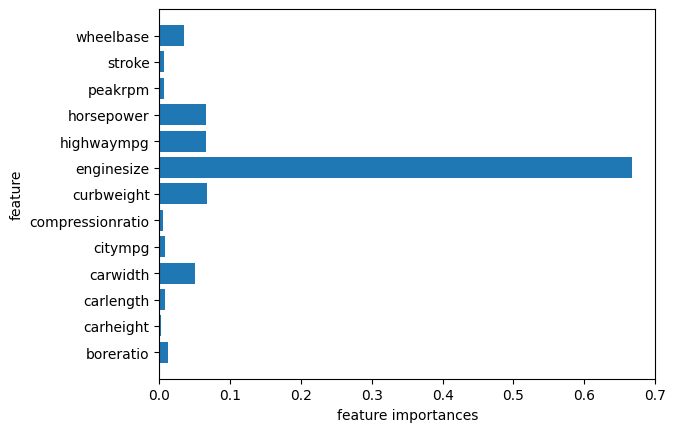

In [173]:
## 변수의 중요도 시각화 표시
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

## 3. 랜덤 포레스트 (Random Forest)

### ✅ 아이디어
- **Bagging의 확장판**
- Bagging처럼 데이터 샘플링 + 다수결/평균을 사용
- 추가로: 각 노드에서 분할할 때 **모든 특성 중 일부만 무작위 선택**
  → 트리 간 상관성↓, 다양성↑
- 여러 **결정트리(Decision Tree)**를 서로 다르게 학습시킨 뒤  **투표(분류)** 또는 **평균(회귀)**으로 예측하는 **배깅(Bagging) 기반 앙상블** 모델.  
- 각 트리는 **부트스트랩 샘플링**(중복 허용 표본추출)과 **특징 무작위 선택**으로 서로 상관을 줄여 성능과 안정성을 높인다.


### ✅ 특징
- 배깅 + 랜덤 특성 선택 → 더 강력하고 안정적
- 고차원 데이터에도 잘 동작
- 대표적인 실무용 알고리즘


## 2) 주요 매개변수 (Parameters, 기본값 포함)

> 공통

- **n_estimators**: `int = 100`  
  학습할 트리 개수. 많을수록 안정적이나 계산량↑.

- **criterion**:  
  - 분류: 
    - **"gini"** (기본값)  
    - 지니 불순도(Gini Impurity)  
    - 무작위로 샘플을 뽑았을 때 잘못 분류될 확률  
    - 계산 간단하고 빠름 → CART 알고리즘 기본

  - **"entropy"**  
    - 엔트로피(Entropy)  
    - 정보 이득(Information Gain) 기반 → ID3/C4.5 계열  
    - 계산량은 조금 더 크지만 이론적 의미가 명확

  - **"log_loss"**  
    - 로그 손실(Log Loss, Cross-Entropy Loss)  
    - 예측 확률 품질을 더 직접적으로 고려  
    - scikit-learn 1.1+부터 추가됨
  - 회귀: 
    - **"squared_error"** (기본값)  
      - 분산 감소(=평균제곱오차, MSE)  
      - 가장 일반적인 기준

    - **"absolute_error"**  
      - 평균 절대 오차(MAE) 기반  
      - 이상치(outlier)에 더 강건

    - **"friedman_mse"**  
      - Friedman 개선 MSE  
      - Gradient Boosting에서 사용되는 기준  
      - 분할 시 변수 선택 안정성↑

    - **"poisson"**  
      - 포아송 분포 기반 기준  
      - 카운트 데이터(비음수 정수)에 적합

- **max_depth**: `int | None = None`  
  트리 최대 깊이. `None`이면 노드가 순수해질 때까지 분할(과적합 위험).

- **min_samples_split**: `int | float = 2`  
  노드 분할에 필요한 최소 샘플 수.

- **min_samples_leaf**: `int | float = 1`  
  리프 노드의 최소 샘플 수.

- **min_weight_fraction_leaf**: `float = 0.0`  
  가중치 합 기준 리프 최소 비율.

    min_samples_leaf

      리프 노드에 포함될 최소 샘플 수

      값이 크면 → 리프가 너무 세분화되는 걸 막아 과적합 방지

    max_leaf_nodes

      트리 전체에서 리프 노드의 최대 개수 제한

      너무 많은 리프 → 과적합 / 너무 적으면 단순화되어 성능 저하 가능

    min_weight_fraction_leaf

      샘플 가중치 합이 전체 데이터에서 차지하는 최소 비율

      불균형 데이터셋에서 유용

- **max_features**:  
  - **분류 기본값**: `"sqrt"` (특징의 √개)  
  - **회귀 기본값**: `1.0` (모든 특징)  
  - 가능한 값: `int`, `float(0~1)`, `"sqrt"`, `"log2"`, `None`

- **max_leaf_nodes**: `int | None = None`  
  최대 리프 수.

- **min_impurity_decrease**: `float = 0.0`  
  이 값 이상 불순도 감소가 있을 때만 분할.

- **bootstrap**: `bool = True`  
  트리 학습에 부트스트랩 샘플 사용 여부.

- **oob_score**: `bool = False`  
  부트스트랩에서 빠진 샘플(OOB)로 **검증 점수**를 내부 추정.

- **n_jobs**: `int | None = None`  
  병렬 처리 코어 수(`-1`이면 모든 코어).

- **random_state**: `int | RandomState | None = None`  
  재현성 제어.

- **warm_start**: `bool = False`  
  기존 트리에 더 추가 학습(증분적으로 n_estimators 늘리기).

- **class_weight** *(분류 전용)*: `dict | "balanced" | "balanced_subsample" | None = None`  
  클래스 불균형 보정.

- **ccp_alpha**: `float = 0.0`  
  비용-복잡도 가지치기(값↑ → 단순화).

- **max_samples**: `int | float | None = None`  
  `bootstrap=True`일 때, 각 트리가 사용할 샘플 수(또는 비율).

---

## 3) 주요 속성 (Attributes)

- **estimators_**: 개별 결정트리들의 리스트.
- **feature_importances_**: 특징 중요도(합=1).  
- **n_features_in_** / **feature_names_in_**: 입력 특징 수 / 이름.
- **n_outputs_**: 출력 차원 수.
- **classes_**, **n_classes_** *(분류)*: 클래스 라벨 / 개수.
- **oob_score_**: OOB 점수(`oob_score=True`일 때).  
- **oob_decision_function_** *(분류)*: OOB 확률/결정함수.  
- **oob_prediction_** *(회귀)*: OOB 예측값.

---

## 4) 주요 메서드 (Methods)

- **fit(X, y[, sample_weight])**: 학습.
- **predict(X)**: 예측(분류=라벨, 회귀=연속값).
- **predict_proba(X)** *(분류)*: 클래스별 확률 평균.
- **predict_log_proba(X)** *(분류)*: 로그 확률.
- **score(X, y)**: 기본은 정확도(분류)/R²(회귀).
- **apply(X)**: 각 샘플이 **각 트리에서 도달한 리프 인덱스** 반환.
- **decision_path(X)**: 트리 내 경로(희소행렬).
- **get_params() / set_params()**: 파라미터 조회/설정.

---

In [182]:
body  = pd.read_csv("./data/bodyPerformance.csv")

body['gender'] = np.where(body['gender'] == "M", 0, 1)
## 클래스는 A인 경우 0 B인 경우 1 C인 경우 2 D인 경우 3
mapping = {
    'A' : 0, 
    'B' : 1, 
    'C' : 2, 
    'D' : 3}
body['class_2'] = body['class'].map(mapping)
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [183]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도 :', clf.score(x_test, y_test))

정확도 : 0.7381781981085117


In [185]:
pred = clf.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
# micro: 전체 TP/FP/FN 합쳐 계산 (클래스 불균형에 둔감, “전체 정확도”와 비슷)
# macro: 클래스별 평균(가중치 동일) → 클래스 불균형에 민감
# weighted: 각 클래스 샘플 수로 가중 평균 → 불균형 데이터에 적합
test_prc = precision_score(y_test, pred, average='micro')
test_rcll = recall_score(y_test, pred, average='micro')
test_f1 = f1_score(y_test, pred, average='micro')

print(test_cm)
print('정확도 :', round(test_acc*100, 2))
print('정밀도 :', round(test_prc*100, 2))
print('재현율 :', round(test_rcll*100, 2))
print('F1 :', round(test_f1*100, 2))

[[844 151   8   1]
 [220 624 126  34]
 [ 77 203 665  60]
 [  5  61 106 833]]
정확도 : 73.82
정밀도 : 73.82
재현율 : 73.82
F1 : 73.82


In [191]:
# 변수의 중요도
importances = clf.feature_importances_
columns_nm = pd.DataFrame(feature_columns)
feature_importances = pd.concat([columns_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,age,0.084834
1,body fat_%,0.097552
2,broad jump_cm,0.075005
3,diastolic,0.044145
4,gender,0.015271
5,gripForce,0.079494
6,height_cm,0.062098
7,sit and bend forward_cm,0.273334
8,sit-ups counts,0.135812
9,systolic,0.047812


In [192]:
## 랜덤포레스트로 회귀분석
## 차량 데이터
car = pd.read_csv("./data/CarPrice_Assignment.csv")

car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))

x = car_num[features]
y = car_num['price']

## 데이터 분할 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [193]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
pred = reg.fit(x_train, y_train).predict(x_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE :', round(mse, 2))
print('MAE :', round(mae, 2))
print('RMSE :', round(rmse, 2))
print('ACC :', round(acc*100, 2))

MSE : 4213210.14
MAE : 1370.2
RMSE : 2052.61
ACC : 93.02


In [194]:
## 변수의 중요도 출력
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,boreratio,0.004147
1,carheight,0.005047
2,carlength,0.006843
3,carwidth,0.019624
4,citympg,0.006223
5,compressionratio,0.003854
6,curbweight,0.206796
7,enginesize,0.630468
8,highwaympg,0.058600
9,horsepower,0.032628


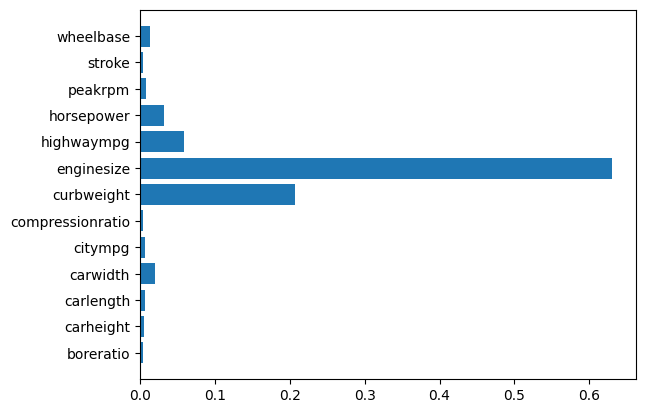

In [195]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
columns_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), columns_nm)
plt.ylim(-1, n_features)
plt.show()

In [196]:
x_train.shape[1]

13